# . 필요 라이브러리 호출하기

데이터 읽기에 필요한 라이브러리를 호출 해야 합니다. 
pandas, numpy 를 호출합니다.

In [1]:
#필요 라이브러리 호출
import pandas as pd
import numpy as np

# 2. 파일 읽기

해당 데이터를 받아 옵니다. pandas의 read_csv를 활용하여 필요 데이터를 불러옵니다.

In [2]:
#파일 불러오기
train = pd.read_csv("wine.csv")

### 불러온 파일을 확인합니다. 앞부분을 확인하고자 하면, head 뒷 부분을 확인해보고 싶으면 tail을 활용해보세요!

In [3]:
train.tail()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
5492,5492,5,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white
5496,5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,white


In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

# 3. 결측치 확인

pandas의 info를 통해 데이터의 형태와 각  column의 형태를 확인할 수 있습니다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5495 non-null   float64
 5   residual sugar        5489 non-null   float64
 6   chlorides             5496 non-null   float64
 7   free sulfur dioxide   5496 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5496 non-null   float64
 11  sulphates             5479 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


결측치의 총 개수를 확인할 수 있습니다. isnull과 sum을 활용해서 해당 데이터에 있는 결측치 가 총 몇개 인지를 확인 할 수 있습니다.

In [6]:
# 결측치 확인
train.isnull().sum()

index                    0
quality                  0
fixed acidity            0
volatile acidity         0
citric acid              2
residual sugar           8
chlorides                1
free sulfur dioxide      1
total sulfur dioxide     0
density                  0
pH                       1
sulphates               18
alcohol                  0
type                     0
dtype: int64

결측값을 다루는 방법은 두 가지가 있습니다. 결측치를 가진 행을 삭제하거나. 평균값 혹은 최빈값으로 대체하는 것입니다.

### 우선 데이터의 평균, 4분위수, 최소값, 최대값을 확인해보세요! describe을 활용해보세요!

In [7]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5495.000000,5489.000000,5496.000000,5496.000000,5497.000000,5497.000000,5496.000000,5479.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318579,5.438850,0.055809,30.414483,115.566491,0.994673,3.219469,0.530484,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145090,4.757361,0.034656,17.673898,56.288223,0.003014,0.160709,0.149386,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### column sulphates에 결측치를 가진 행을 모두 삭제 해보세요. dropna(how="any")를 활용해보세요!

- 특정 칼럼에만 nan값이 있는지 확인하고 있을 경우만 삭제하고 싶을 때는 subset을 이용한다.
- how = "all" : 특정 행의 모든 값이 널값이어야 삭제한다.
- how = "any" : 특정 행에서 널값이 하나라도 있으면 삭제한다.

In [8]:
train_del_sulphates=train.dropna(subset=["sulphates"],how='any', axis=0)

In [9]:
train_del_sulphates.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             2
residual sugar          8
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 0
type                    0
dtype: int64

### 남은 결측치의 값들을 각각의 평균 값으로 대체합니다! <br>
3-1. 먼저 각 열의 평균 값을 변수로 만듭니다. <br>
3-2. 다음으로 fillna를 활용하여 결측치의 값을 평균 값으로 대체합니다.

axis=0은 각 열의 모든 행에 대해서 동작합니다. 

  - drop 각 열의 행을 지운다

  - mean 각 열의 요소(행)들의 평균을 구한다.

  - rank 각 열의 요소(행)들의 순위를 구한다.

 

axis=1은 각 행의 모든 열에 대해서 동작합니다.

 - drop 각 행의 열을 지운다.

 - mean 각 행의  요소(열)들의 평균을 구한다.

 - rank 각 행의 요소(열)들의 순위를 구한다

In [10]:
# 3-1
mean_list=[]
null_list = ["citric acid","residual sugar","chlorides","free sulfur dioxide","pH"]

for index in null_list:
    index_mean=train_del_sulphates[index].astype("float").mean(axis=0)
    mean_list.append(index_mean)
print(mean_list)


[0.31856673361328697, 5.445859989033082, 0.055834246075209946, 30.44194961664841, 3.219594742606786]


In [11]:
#3-2
for i in range(len(null_list)):
    train_del_sulphates[null_list[i]] = train_del_sulphates[null_list[i]].fillna(mean_list[i])

<ipython-input-11-9e2d705123a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_del_sulphates[null_list[i]] = train_del_sulphates[null_list[i]].fillna(mean_list[i])


In [12]:
train_del_sulphates.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [13]:
train_del_sulphates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5479 non-null   int64  
 1   quality               5479 non-null   int64  
 2   fixed acidity         5479 non-null   float64
 3   volatile acidity      5479 non-null   float64
 4   citric acid           5479 non-null   float64
 5   residual sugar        5479 non-null   float64
 6   chlorides             5479 non-null   float64
 7   free sulfur dioxide   5479 non-null   float64
 8   total sulfur dioxide  5479 non-null   float64
 9   density               5479 non-null   float64
 10  pH                    5479 non-null   float64
 11  sulphates             5479 non-null   float64
 12  alcohol               5479 non-null   float64
 13  type                  5479 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 642.1+ KB


# 4. EDA

우선 EDA에 필요한 라이브러리를 호출합니다. matplotlib, matplotlib.pyplot, seaborn을 불러옵니다.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

### value_counts와 unique를 활용하여, 각 column 데이터의 특징을 파악해보세요

In [15]:
df=train_del_sulphates.copy()

for col in df.columns[1:]:
    print(f"{col}")
    print(f"unique 개수: {df[col].nunique()}")
    print(f"{df[col].value_counts()}")

quality
unique 개수: 7
6    2404
5    1783
7     923
4     186
8     152
3      26
9       5
Name: quality, dtype: int64
fixed acidity
unique 개수: 106
6.80     291
6.60     281
7.00     247
6.40     247
6.90     241
        ... 
13.40      1
14.30      1
7.15       1
4.20       1
13.50      1
Name: fixed acidity, Length: 106, dtype: int64
volatile acidity
unique 개수: 179
0.280    240
0.240    238
0.260    217
0.270    197
0.200    191
        ... 
0.215      1
1.130      1
1.035      1
1.010      1
1.025      1
Name: volatile acidity, Length: 179, dtype: int64
citric acid
unique 개수: 90
0.30    282
0.28    257
0.32    248
0.49    238
0.34    211
       ... 
0.76      1
0.99      1
0.81      1
1.66      1
0.86      1
Name: citric acid, Length: 90, dtype: int64
residual sugar
unique 개수: 310
1.80     193
1.40     189
2.00     186
1.60     181
1.20     168
        ... 
9.15       1
8.65       1
15.25      1
15.15      1
18.50      1
Name: residual sugar, Length: 310, dtype: int64
chlorides
uniq

본격적인 EDA를 시작합니다. <br>
seaborn의 countplot을 활용하여 각 열의 특징을 파악합니다.<br>

이때 column 값이 범주형 데이터가 아닌 연속형 변수라면,  sns distplot을 활용해서 분포형태를 참고하는 것이 좋은 방법일 수 있습니다. <br>

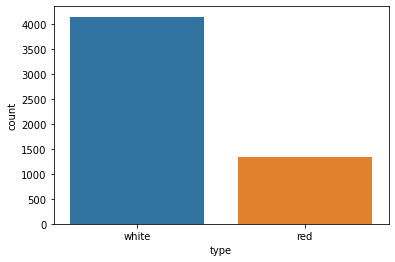

In [16]:
import warnings

warnings.filterwarnings('ignore')

sns.countplot("type",data=df)
plt.show()

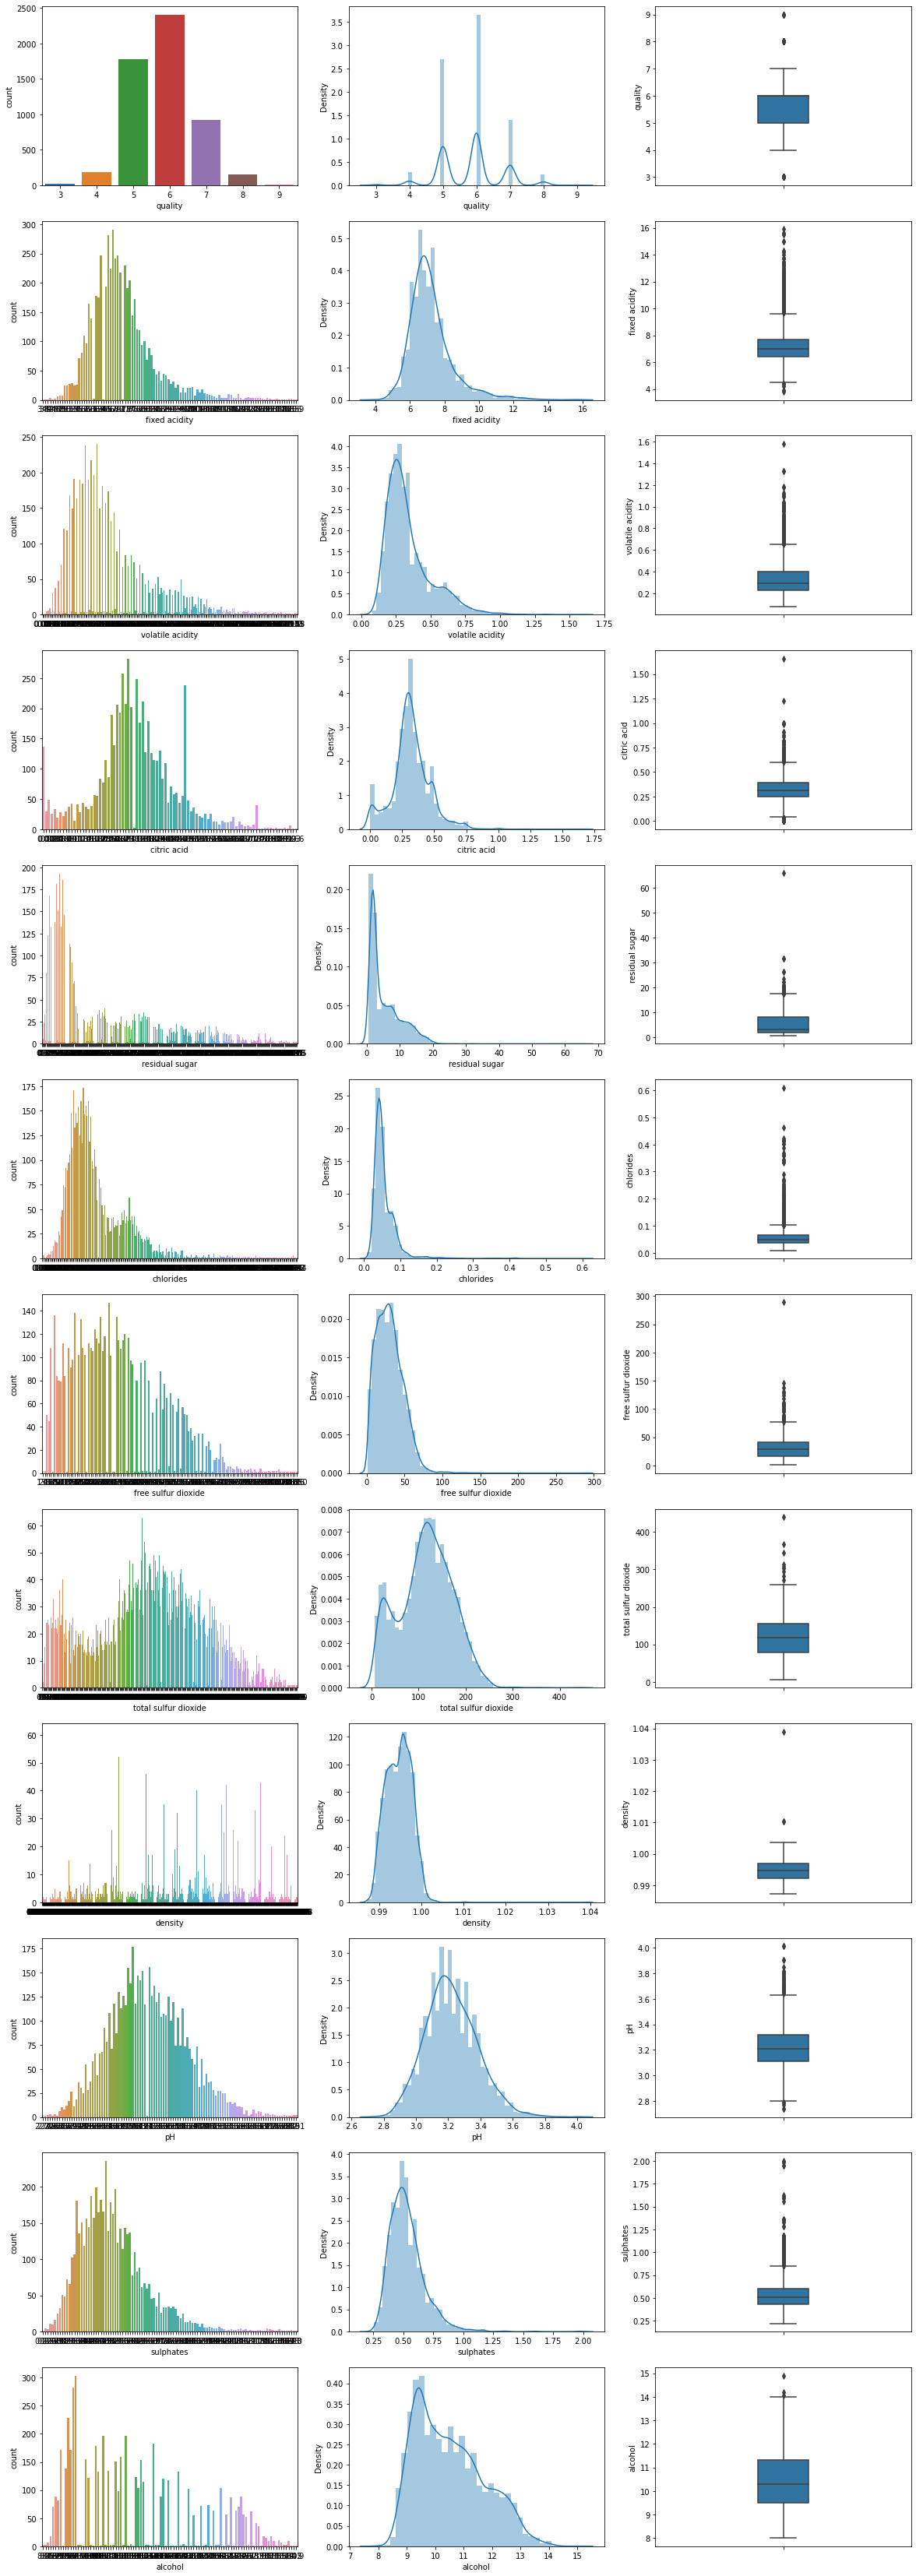

In [17]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

dfCol= df.columns[1:-1]
fig,ax=plt.subplots(len(dfCol),3,figsize=(20,60))

for i in range(len(dfCol)):
    sns.countplot(dfCol[i],data=df,ax=ax[i,0])
    sns.distplot(df[dfCol[i]],ax=ax[i,1])
    sns.boxplot(y=df[dfCol[i]],ax=ax[i,2],width=0.2)
plt.show()


저희는 다른 column 값을 통해 와인 quality를 예측하는 데이터를 활용하고 있습니다. 이에 따라 각 column과 quality 간의 특성을 비교해야 합니다.<br><br>

[violinplot]<br>
violinplot은 형태가 마치 바이올린과 유사하다 하여 이름붙었습니다. 바이올린 플롯 (Violin plot)은 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프 형식입니다. <br>
박스 플롯 (Box plot)과 비슷하지만 더 실제에 가까운 분포를 알 수 있다는 장점이 있습니다.<br><br>

[stripplot]<br>
데이터 포인트가 중복되어 범주별 분포를 그린다.<br><br>


[swarmplot]<br>
위 그래프는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다.<br>
즉, 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있다.<br><br>

[lineplot]<br>
위 그래프는 편차와 신뢰구간을 그림자로 표현하여 선 그래프를 보여줍니다.

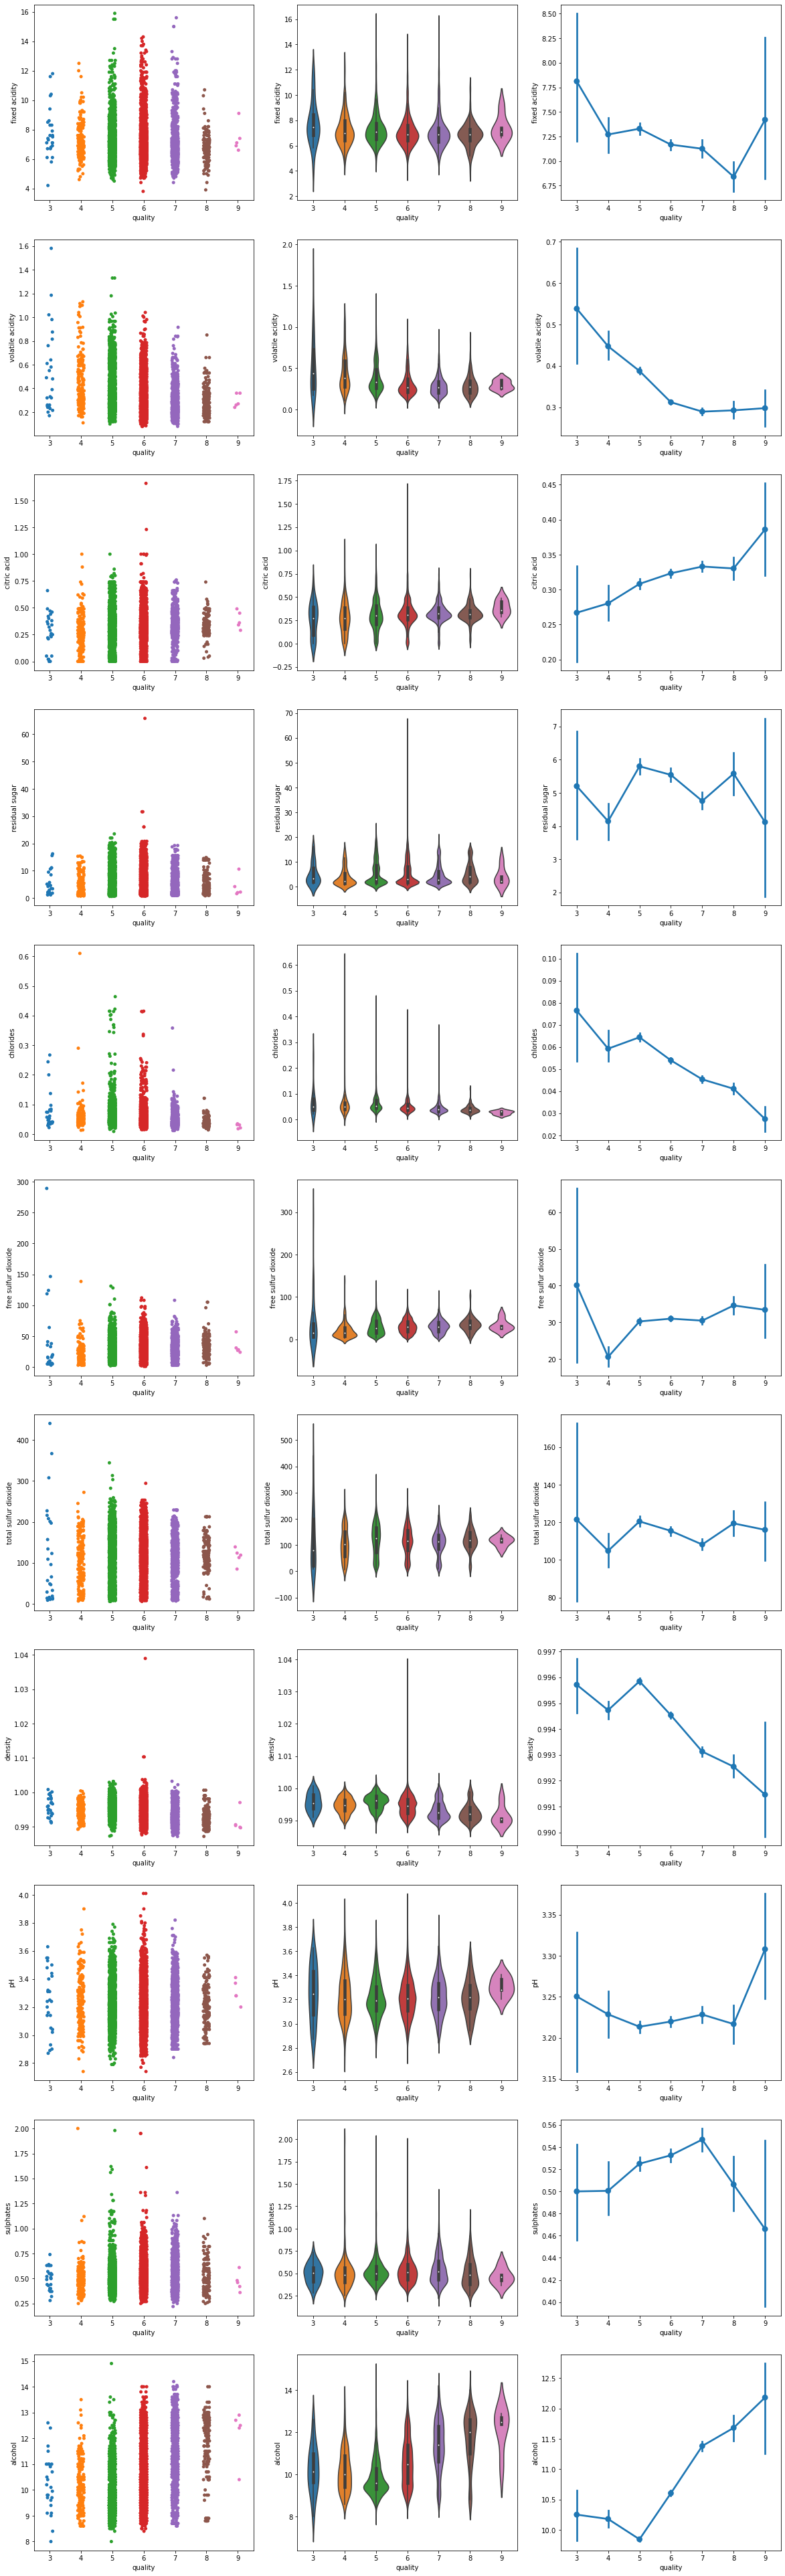

In [18]:

dfCol2= df.columns[2:-1]
fig,ax=plt.subplots(len(dfCol2),3,figsize=(20,70))
#print(dfCol2)

#stripplot, violin,factorplot-> 은 ax가 적용이 안되기 때문에 pointplot으로 바꿔줌
#https://m.blog.naver.com/fbfbf1/222458265191
#sns.factorplot('quality',dfCol2[i],data=df,ax=ax[i,2])
    
for i in range(len(dfCol2)):
    sns.stripplot('quality',dfCol2[i],data=df,ax=ax[i,0])
    sns.violinplot('quality',dfCol2[i],data=df,ax=ax[i,1])
    sns.pointplot('quality',dfCol2[i],data=df,ax=ax[i,2])
    
plt.show()
    

### heatmap은 각 column 간의 상관계수를 파악하여, 관계를 파악할 수 있으며, 다중 공산성에 대해 대략적으로 파악할 수 있습니다. 

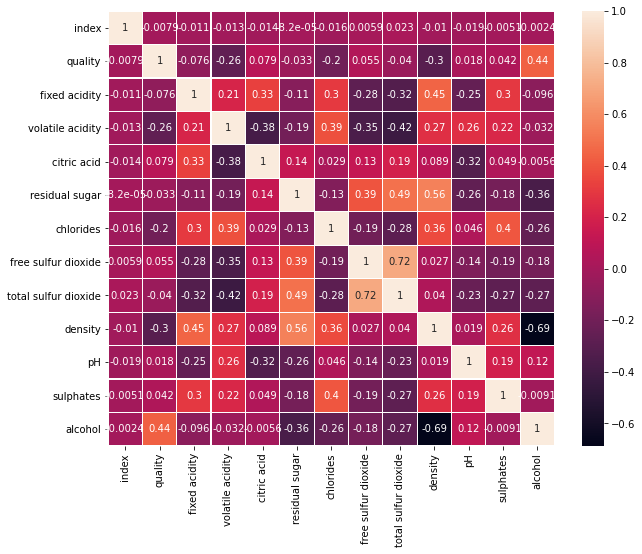

In [19]:
sns.heatmap(df.corr(), annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()